In [2]:
import sympy as sp
sp.init_printing()

# Exercices sur les accéléromètres

## 7.1 Accéléromètre capacitif

On a un accéléromètre capacitif constitué d'une masse sismique de masse $m$ montée sur un ressort de coefficient $K_r$. L'air ambiant cause un amortissement $K_f$ proportionnel à la vitesse de déplacement de la masse. La masse est un disque de diamètre $d$ et d'épaisseur $e$.

La distance entre les électrodes externes et la masse est de x0 au repos. La masse est centrée entre les électrodes.

On soumet l'accéléromètre à une vibration sinusoïdale $x=x_0 \sin(\omega t)$.

La position est déduite de la mesure de capacité entre la masse et chacune des électrodes. 

1. Quelle est la fréquence maximum de la vibration si veut rester 10x sous la fréquence propre du capteur ?
2. Quelle accélération maximum le capteur peut-il mesurer ?
3. Donner l'expression des capacités comme fonction du déplacement. Comment tirer profit des 2 valeurs pour augmenter la résolution ?



La fréquence max est de 


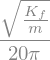

In [38]:
# 1. Fréquence maximum mesurable

Kf, Kr, m, e, d, x0, omega, t = sp.symbols('K_f, K_r, m, e, d, x_0, omega, t')

w0=sp.sqrt(Kf/m)
print("La fréquence max est de ")
w0/10/2/sp.pi

L'accélération maximum est :


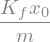

In [39]:

# L'accélération maximum est atteinte quand le déplacement vaut x0
a_max=sp.symbols('a_max')
sol=sp.solve(sp.Eq(m*a_max , x0 * Kf),a_max)
print("L'accélération maximum est :")
sol[0]

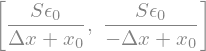

In [40]:
# 3. Calcul de la variation de capacité :
e0,S=sp.symbols('epsilon_0,S')
dx=sp.Symbol("\Delta x")
C1= S/(x0+dx)*e0
C2= S/(x0-dx)*e0
[C1,C2]

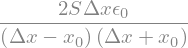

In [41]:
sp.simplify(C1-C2) # On soustrait les 2 valeurs pour augmenter la sensibilité

## 7.2 Capteur Piézo-électrique

Un cristal piézo-électrique est construit avec un matériel qui a les propriétés suivantes dans une direction :
- coefficient $\beta$ exprimé en [C/mm/N] qui représente la charge induite par unité de force et de longueur du cristal.
- perméabilité relative $\epsilon_r$ du cristal
- Un module d'élasticité $E$ [N/m^2]

On décide d'employer un cristal cylindrique, définit par une hauteur $h$ et un diamètre $d$.
  
On aimerait générer une étincelle pour un briquet. Pour celà, la tension doit atteindre V1 volts. Le briquet comporte une gachette qui permet de tendre un ressort avec une masse $m$ et de le relâcher d'un coup contre le cristal piézo-électrique. On a besoin que la force lors de l'impact soit suffisante pour créer une tension qui provoque l'étincelle. La charge électrique générée charge la capacité du cristal et crée ainsi une tension.

1. Calculer la sensibilité du cristal comme fonction de sa longueur et la capacité électrique comme fonction de la longeur et de la surface. Calculer la tension induite qui en résulte.
2. Comment choisir le rapport entre largeur et longeur ?
3. Quelle force est nécessaire pour créer la tension requise ?
4. En supposant que la masse arrive contre le cristal à une vitesse $v0$, elle comprime le cristal jusqu'à l'arrêt. La force est maximum juste avant l'arrêt. A partir du calcul sur l'énergie stockée par la masse sur un ressort, écrivez une relation entre $v0$ et la force $F$ juste avant l'arrêt.
5. Si la masse est chargée sur un ressort d'une course de 10mm avant d'être relâchée, quelle est la force nécessaire pour tirer la gachette ?

Tension obtenue pour une force F


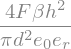

In [48]:
# 1. Sensibilité et capacité du cristal
beta, d,h,er,e0,F = sp.symbols('beta,d,h,e_r,e_0,F', positive=True)
Se=beta*h # Sensibilité du cristal complet
C=sp.pi*d**2/(4*h)*er*e0

# Tension pour une force F
U= Se * F / C
print("Tension obtenue pour une force F")
U

In [49]:
# 2. Le diamètre à intérêt à être petit et la hauteur grande. 
#    On a plutôt un cylindre allongé qu'une pastille.

Force nécessaire pour obtenir V1


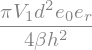

In [50]:
# 3. La force minimale nécessaire pour obtenir une tension V1 est 
V1=sp.symbols('V_1', positive=True)
F_min=sp.solve(sp.Eq(V1,U),F)[0]
print("Force nécessaire pour obtenir V1")
F_min

Energie contenue dans un ressort


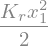

In [51]:
# 4.1 Relation de l'énergie d'une masse sur un ressort
Kr,x,x1,m,v0,E = sp.symbols('K_r,x,x_1,m,v_0,E', positive=True)
F=Kr*x
E_r=F.integrate((x,0,x1))
print("Energie contenue dans un ressort")
E_r

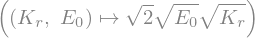

In [52]:
# La force maximum qu'une masse subit en ralentissant sur un ressort est données par
F_max=Kr*x1
# On peut calculer pour une énergie donnée quelle est la force maximum

E0=sp.symbols('E_0', positive=True)
x1_max=sp.solve(sp.Eq(E0, E_r),x1)[0]
F_max=sp.Lambda((Kr, E0),Kr*x1_max)
F_max

Constante d'élasticité du cristal


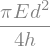

In [61]:
# 4.2 Pour obtenir une relation entre v0 et la force maximum, on a l'énergie cinétique avant l'impact
#        qui doit être égale à l'énergie sur le ressort

# a) On calcule la constante de compressibilité du cristal
E=sp.symbols('E') # Module de compressibilité du cristal
K_cristal, E_min=sp.symbols('K_cristal, E_min', positive=True)
# Pour le cristal piézoélectrique, le module d'élasticité est
K_cristal = E*d**2*sp.pi/(4*h)
print("Constante d'élasticité du cristal")
K_cristal

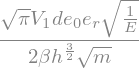

In [62]:
# b) La force maximum est liée à l'énergie stockée dans le cristal par la valeur de K_r.
#       La force donne x1, x1 donne E_r et E_r = 1/2 m v0^2
x1_min=F_min / K_cristal
E_min = K_cristal * x1_min**2/2
v0 = sp.sqrt(E_min*2 / m)
sp.simplify(v)

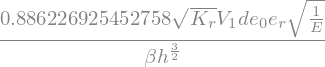

In [70]:
# 5. Force sur le ressort de la poignée (constante Kr)
#     même formulation... on a un rapport entre la contraction et la constante du ressort
xr=sp.symbols('x_r', positive=True)
xr_sol=sp.solve(sp.Eq(Kr*xr**2/2, 1/2*m*v0**2), xr)
F_arm=xr_sol[1]*Kr
F_arm

In [68]:
# Valeur numériques. Force sur le piezzo
valeurs={d:0.003, e0:8.85e-12, er:4.5, E:8e12,beta:2.26e-9, V1:1000}
F_min.subs(valeurs).subs(h,0.01).evalf()

In [72]:
# Force pour armer le ressort
F_arm.subs(valeurs).subs(h,0.01).evalf()

In [74]:
F_arm.subs(valeurs).subs(h,0.01).subs(Kr,1)

## 7.3 Equilibrage d'une roue

Une installation permet de faire tourner une roue de voiture. Le moteur est monté sur une suspension avec un accéléromètre. Un codeur incrémental permet d'avoir la position angulaire de la roue. Un index est utilisé pour repérer la position absolue.

Le moteur fait tourner la roue à une vitesse N[rpm]. Le compteur associé au codeur incrémental de S stries compte toutes les transitions des signaux A et B. 

Le signal venant de l'accéléromètre est de forme sinusoïdale $s(t)=V_0 \cdot \sin(\omega t)[V]$. On a relevé que le compteur atteint une valeur M1 lorsque le signal est en début de période ($t=0$). 

On utilise un accéléromètre piézo-électrique de sensibilité $S$ connecté à un amplificateur de charge de gain $g$[V/C]. Il est monté sur le moteur. L'ensemble d'entraînement a une masse $m_E$.

A quelle position M2 du compteur faut-il placer une masse d'équilibrage, et de quelle grandeur ?

la masse doit être de 


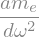

In [27]:
# L'accélération observée correspond à un excès de masse dans une direction. Cet excès 
# de masse provoque une force qui "secoue" le moteur.
m_e,a,w,d,m=sp.symbols('m_e,a,omega,d,m')
F_c=m_e*a

# La force centrige est équivalent à une masse à une distance de l'axe
print("la masse doit être de ")
sp.solve(sp.Eq(F_c,w**2*d*m),m)[0]

In [ ]:
# La position est doit être à l'opposé du pic d'accélération. La position M1 correspond 
# à 90° avant le pic. Il faut mettre la masse à M2=-M1